In [1]:
import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE')
from MPRA_exp.MPRA_predict.utils import *

In [2]:
df = pd.read_csv('../../data/SirajMPRA/SirajMPRA_563k_pair.csv')
# Siraj_df.rename(columns={'SKNSH': 'SK-N-SH'}, inplace=True)
df

,Unnamed: 0,description,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,alt
0,0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,A
1,1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.415984,0.554099,0.441904,-0.288019,False,chr1,14677,G,A
2,2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,C
3,3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.151995,-0.659023,0.204721,1.050619,False,chr1,63697,T,C
4,4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562649,562649,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.615976,1.927090,0.798263,1.035440,False,chrX,155233098,T,C
562650,562650,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,G
562651,562651,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.894634,-0.072647,1.973661,0.794848,False,chrX,155233794,A,G
562652,562652,chrX:155234730:T:C,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312172,0.165634,-0.041383,0.444472,True,chrX,155234730,T,C


In [3]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

In [4]:
# fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
# left, right, bottom, top = 0.15, 0.95, 0.15, 0.95
# ax.set_position([left, bottom, right - left, top - bottom])

# sns.set_style("whitegrid")
# for cell_type in cell_types:
#     sns.kdeplot(Siraj_df[cell_type], label=cell_type, alpha=0.8)
# plt.legend()
# plt.xlim(-6, 6)
# plt.xlabel('Enhancer activity (log2 fold change)')
# plt.ylabel('Density')
# plt.savefig('../figures/Siraj_enhancer_activity_kde.png', dpi=400)

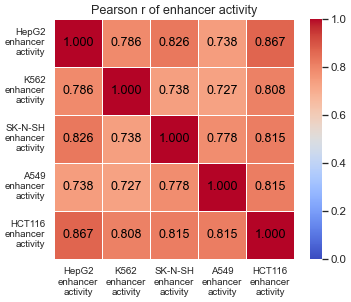

In [5]:
# corr_matrix = Siraj_df[cell_types].corr(method='pearson')
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# np.fill_diagonal(mask, False)

corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[f'{cell_types[i]}']
        y = df[f'{cell_types[j]}']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
sns.heatmap(corr_matrix, square=True, linewidths=1,
            cmap='coolwarm', vmin=0, vmax=1, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\nenhancer\nactivity' for cell_type in cell_types], 
           rotation=0, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\nenhancer\nactivity' for cell_type in cell_types], 
           rotation=0, fontsize=14)

plt.title('Pearson r of enhancer activity')
plt.savefig('../figures/Siraj_heatmap_enhancer_activity.png', dpi=400)
plt.show()

In [ ]:
# 明天用得上的代码

corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[f'{cell_types[i]}_DNase_pred_logit']
        y = df[f'{cell_types[j]}_DNase_fold_change']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
sns.heatmap(corr_matrix, square=True, linewidths=1,
            cmap='coolwarm', vmin=0, vmax=1, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\npredicted\nDNase' for cell_type in cell_types], 
           rotation=0, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\nobserved\nDNase' for cell_type in cell_types], 
           rotation=0, fontsize=14)

plt.title('Pearson r of predicted DNase and observed DNase')
plt.savefig('../figures/Siraj_Pearson_heatmap_predicted_DNase_observed_DNase.png', dpi=400)
plt.show()

In [ ]:
# 明天用得上的代码

corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[f'{cell_types[i]}_DNase_fold_change']
        y = df[f'{cell_types[j]}']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)


plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
sns.heatmap(corr_matrix, square=True, linewidths=1,
            cmap='coolwarm', vmin=0, vmax=1, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\nobserved\nDNase' for cell_type in cell_types], 
           rotation=0, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\nenhancer\nactivity' for cell_type in cell_types], 
           rotation=0, fontsize=14)

plt.title('Pearson r of observed DNase and enhancer activity')
plt.savefig('../figures/Siraj_Pearson_heatmap_observed_DNase_enhancer_activity.png', dpi=400)
plt.show()

In [ ]:
# 明天用得上的代码

corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[f'{cell_types[i]}_DNase_pred_logit']
        y = df[f'{cell_types[j]}']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
sns.heatmap(corr_matrix, square=True, linewidths=1,
            cmap='coolwarm', vmin=0, vmax=1, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\npredicted\nDNase' for cell_type in cell_types], 
           rotation=0, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\nenhancer\nactivity' for cell_type in cell_types], 
           rotation=0, fontsize=14)

plt.title('Pearson r of predicted DNase and enhancer activity')
plt.savefig('../figures/Siraj_Pearson_heatmap_observed_DNase_enhancer_activity.png', dpi=400)
plt.show()

In [6]:
Gosai_df = pd.read_csv('../../data/GosaiMPRA/GosaiMPRA_designed.csv')
# Gosai_df = Gosai_df[Gosai_df['origin'] != 'control']
cell_types = ['HepG2', 'K562', 'SKNSH']
Gosai_df

,seq,origin,K562,HepG2,SKNSH
0,TCGAAACAGGTATACCGCCAGCAATCCAATCTCTACCGGTGTACAC...,Simulated_Annealing,-0.311911,2.196081,-0.917639
1,GCTAAGGTCCTTATTGAATTTTGGTTAATCATTAACTACCCGTCAT...,Simulated_Annealing,-1.110302,0.880661,-1.097117
2,TGGTCCATTCCTGGGAATTTGCCGCCTGTACCTGCAAGGTTATACA...,Simulated_Annealing,-0.545083,2.169025,-1.135171
3,TCGGGAGATGTCAACACCTGTTGAGCTATTATGCCCTAGCCTGGTT...,Simulated_Annealing,-0.769610,2.042634,-0.703300
4,GACTTTGAACTCTGGACAGCAGAACAAATCACGGGAACCCTGTCAT...,Simulated_Annealing,-0.654328,2.037279,-1.243780
...,...,...,...,...,...
76163,CTCGGAGTTCAAGAAAATCATCTCACACGGCCGTCTCAGACCCTTC...,control,-0.315267,0.591628,0.068697
76164,GCAATCCTACCCAGACAGATGCAGACAGCGACCTGGTGGGGGATGT...,control,-0.134821,-0.359782,-0.022281
76165,CCTATGCTGCCTCCTATGCCCTTGTCATCATTGCCATTTTTGAGCT...,control,0.646673,0.489900,0.462366
76166,AGCCACAACAAAACAGCCAGTTAATGTGGAAACAAGGTCGACAACT...,control,-0.061676,-0.014411,0.239693


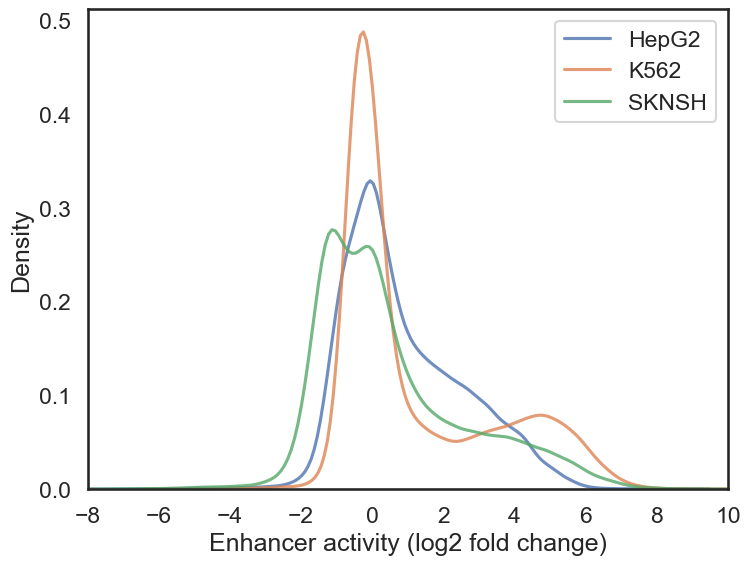

In [7]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
left, right, bottom, top = 0.15, 0.95, 0.15, 0.95
ax.set_position([left, bottom, right - left, top - bottom])

sns.set_style("whitegrid")
for cell_type in cell_types:
    sns.kdeplot(Gosai_df[cell_type], label=cell_type, alpha=0.8)
plt.legend()
plt.xlim(-8, 10)
plt.xlabel('Enhancer activity (log2 fold change)')
plt.ylabel('Density')
plt.savefig('figures/Gosai_design_kde.png', dpi=400)

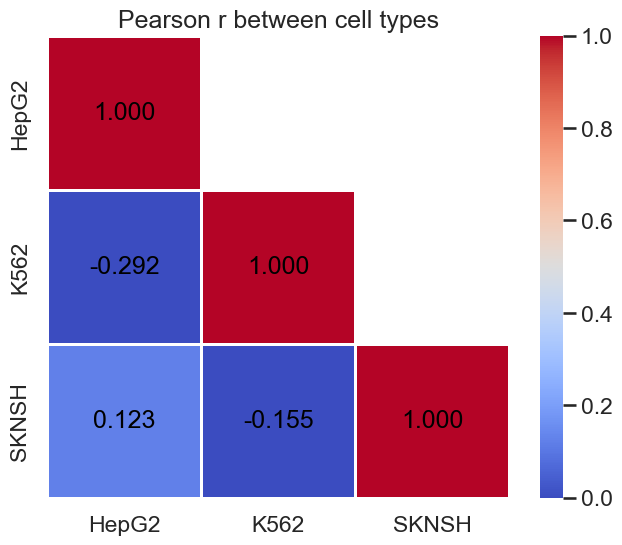

In [8]:
corr_matrix = Gosai_df[cell_types].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
np.fill_diagonal(mask, False)

sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
left, right, bottom, top = 0.15, 0.95, 0.15, 0.95
ax.set_position([left, bottom, right - left, top - bottom])

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.title('Pearson r between cell types')
plt.savefig('figures/Gosai_deigned_heatmap.png', dpi=400)
plt.show()